# Graph time patterns obtained from connecting pipes to main trunk

### Obtain the conceptual network as a list of sewers and catchments ----------------------


In [10]:
import SWMMToWESTConvert.aggregateNetwork as agN
import SWMMToWESTConvert.updateWESTfiles as uw

#MODEL points for checking the flow
LIMOILOU_COL="DOM_941798"
PASCAL_COL = "U004"
STSACRA_COL = "UNI_602608"
BEAU_COL = 'Pompe-Beauport'
NOEST_COL= 'U003_Nord_Ouest'
linkMeasurementFlow = [LIMOILOU_COL,BEAU_COL,STSACRA_COL,NOEST_COL,PASCAL_COL]

WTP_TANK = "RA_606859"
ST_SACR_LEAF_NODE= "R007637"

In [11]:
file = 'DWF2022.inp' 

pipesModel, catchmentsModel = agN.aggregateTrunk(file, WTP_TANK, ST_SACR_LEAF_NODE, linkMeasurementFlow)

There were  17 subcatchments with area 0
Number of nodes  1493 , outlets  1421 , startPoints  72 , and after cleaned  70
R008120   pop from empty list
R571863   pop from empty list
There are 21 connections to the path
5 connections to the path were removed due to no flow at anytime.
Number of measurement points 5
Number of catchments nodes  118
Number of dw flows  91
Number of direct flows  133
Number of divisions by meassurement or input nodes 17
----------------------------
Final number of pipe sections  17
Final number of catchments:  22
Final number of tanks in series: 44


c:\Users\lllov\OneDrive - Université Laval\Desktop\01-Repositories\SWMMtoWEST\.venv\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


### Create the graphs ------------------------------------------------------------------------

In [12]:
#imports required for the graphs
import pandas as pd
import graphs.utils as utg
import matplotlib.pyplot as plt

Extracts the patterns from the obtained conceptual model

In [13]:

# parameter: catchments is a list of dictionaries including the key 'timePattern'
# returns a dataframe
def extractPatterns(catchments):
    patterns = []
    cols = [f'H{i:02d}' for i in range(24)]

    for c in catchments:

        p = c['TimePattern']
        
        if p is not None:
            patterns.append(p)

    dfPatterns = pd.DataFrame(patterns, columns=cols)
    dfPatterns = dfPatterns.apply(pd.to_numeric, errors='coerce')

    return dfPatterns


In [14]:
pattrns = extractPatterns(catchmentsModel)

#remove tpatterns of catchments expect '0', the rest are only timeseries converted
dfTS = pattrns.iloc[[0,1,3,4,7,9,10,11,12,13,15,16,18,19,20]]

#the range of these patterns are too large compared with all the other ones so they need to be separately plotted
dfTS8 = pattrns.iloc[8] 
dfTS5 = pattrns.iloc[5]

Create the join plot of all similar patterns, and compared to pattern "0" = "series sanitarie"

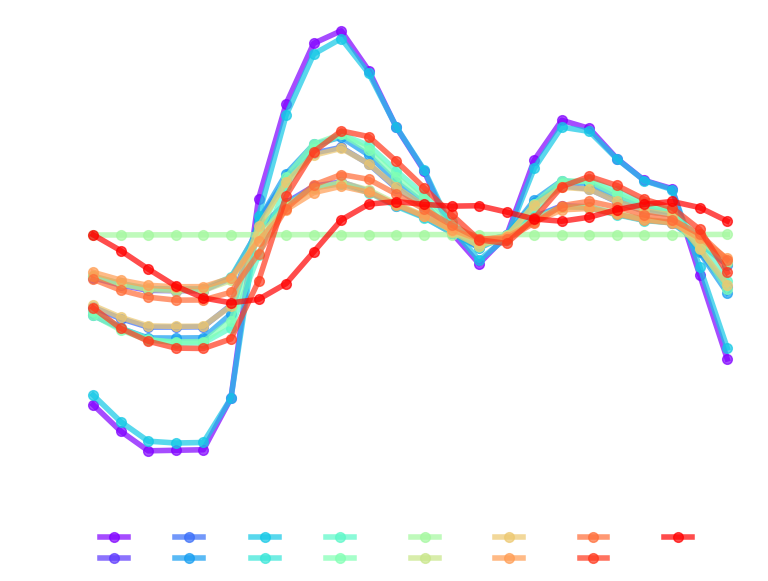

In [15]:

#For PPTs
plt.rcParams["text.color"] = 'white'

fig1, ax  = plt.subplots(figsize=(9,6)); #creates the figure

dfTS.T.plot(ax=ax, alpha=0.7, linewidth=4,marker = "o",ms=7,colormap='rainbow');


ax= utg.modifyForPpt(ax)
ax.legend(ncol=8,loc='upper center',bbox_to_anchor=(.5,-.1), framealpha=0);#puts the figure in the bottom center with 4 col
utg.removeTopRightFrame(ax);


ax.set_xlabel("Hour");
ax.set_ylabel("Factor");

fig1.savefig('02-Output/01-Graphs/'+'TPatterns'+'.png', dpi=200, bbox_inches='tight',transparent=True); #saves the fig
    

Create graphs for single patterns

In [16]:
def createPatternPlot(df,color,figName):

    fig1, ax  = plt.subplots(figsize=(6,4)); #creates the figure

    df.plot(ax=ax, alpha=0.7, linewidth=4,marker = "o",ms=7,color=color);

    ax= utg.modifyForPpt(ax)
    ax.legend(ncol=14,loc='upper center',bbox_to_anchor=(.5,-.1), framealpha=0);#puts the figure in the bottom center with 4 col
    utg.removeTopRightFrame(ax);

    ax.set_xlabel("Hour");
    ax.set_ylabel("Factor");

    fig1.savefig('02-Output/01-Graphs/'+ figName+'.png', dpi=200, bbox_inches='tight',transparent=True); #saves the fig

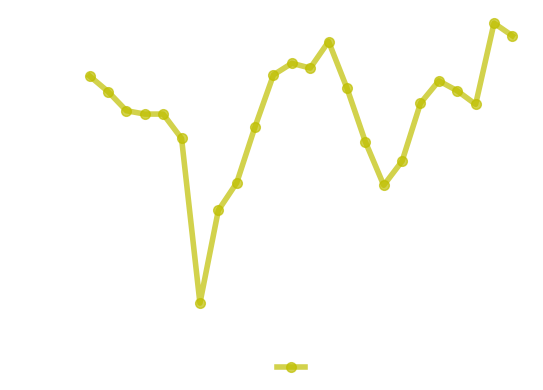

In [17]:
createPatternPlot(dfTS5,'y','TPatterns5')

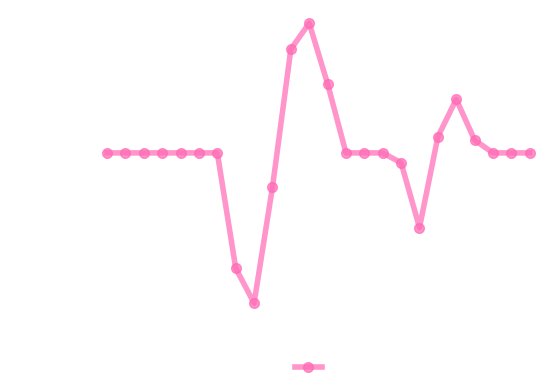

In [18]:
createPatternPlot(dfTS8,'hotpink','TPatterns8')

Graph all the timepatterns from SWMM

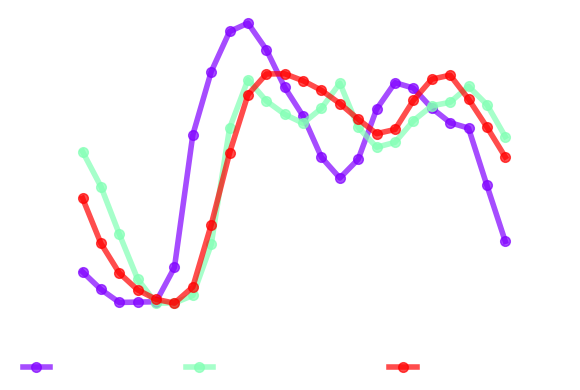

In [19]:
patternComparisonCsv = '01-Data/07-SWMMTimePatterns.csv'

patSWMM = pd.read_csv(patternComparisonCsv, delimiter = ',')

fig1, ax  = plt.subplots(figsize=(6,4)); #creates the figure

patSWMM.plot(ax=ax, alpha=0.7, linewidth=4,marker = "o",ms=7,colormap='rainbow');

ax= utg.modifyForPpt(ax)
ax.legend(ncol=14,loc='upper center',bbox_to_anchor=(.5,-.1), framealpha=0);#puts the figure in the bottom center with 4 col
utg.removeTopRightFrame(ax);

ax.set_xlabel("Hour");
ax.set_ylabel("Factor");

fig1.savefig('02-Output/01-Graphs/'+'TPatternsSWMM'+'.png', dpi=200, bbox_inches='tight',transparent=True); #saves the fig